## Decision Tree Classifier
## Data: Car Evaluation

In [1]:
# Importing the libraries

import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
car = pd.read_csv('car_evaluation.csv')
car.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
car.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [5]:
car.shape

(1727, 7)

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boat', 'safety', 'class']
car.columns = col_names

In [7]:
car.head()

,buying,maint,doors,persons,lug_boat,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boat', 'safety', 'class']
for col in col_names:
    print(car[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boat, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


# Summary of variables
+ There are 7 variables in the dataset. All the variables are of categorical data type.
+ These are given by buying, maint, doors, persons, lug_boot, safety and class.
+ Class is the target variable.

In [9]:
car['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

# Checking the missing values

In [10]:
car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boat    0
safety      0
class       0
dtype: int64

# Creating the feature set and target variable

In [11]:
X = car.drop(['class'], axis = 1)
y = car['class']

# Split data into training and test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [13]:
X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [14]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boat    object
safety      object
dtype: object

In [15]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder


In [16]:
encoder = OrdinalEncoder()

In [17]:
# encode variables with ordinal encoding



X_train = encoder.fit_transform(X_train)

X_test = encoder.fit_transform(X_test)

In [18]:



X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [19]:
X_train.shape

(1157, 6)

In [20]:
import numpy as np
import pandas as pd

In [21]:
data = np.array (X_train)
X_train = pd. DataFrame(data)

In [22]:
X_train.head()

,0,1,2,3,4,5
0,3.0,3.0,3.0,0.0,1.0,1.0
1,3.0,3.0,1.0,2.0,1.0,2.0
2,0.0,3.0,1.0,1.0,2.0,2.0
3,3.0,0.0,1.0,2.0,1.0,1.0
4,2.0,0.0,2.0,2.0,2.0,1.0


In [23]:
data_1=np.array(X_test)
X_test = pd.DataFrame(data_1)

In [24]:
X_test.head()

,0,1,2,3,4,5
0,0.0,0.0,2.0,0.0,0.0,1.0
1,2.0,3.0,2.0,1.0,0.0,1.0
2,0.0,0.0,3.0,0.0,0.0,0.0
3,1.0,0.0,3.0,1.0,1.0,2.0
4,2.0,1.0,2.0,2.0,1.0,1.0


In [25]:
X_test = X_test.astype(int)

In [26]:
X_test.head()

,0,1,2,3,4,5
0,0,0,2,0,0,1
1,2,3,2,1,0,1
2,0,0,3,0,0,0
3,1,0,3,1,1,2
4,2,1,2,2,1,1


In [27]:
X_train = X_train.astype(int)
X_train.head()

,0,1,2,3,4,5
0,3,3,3,0,1,1
1,3,3,1,2,1,2
2,0,3,1,1,2,2
3,3,0,1,2,1,1
4,2,0,2,2,2,1


# Decision Tree Classifier with Gini Index

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state =0)

# fit the model

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

# Predict the test results with gini index

In [30]:
y_pred_gini = clf_gini.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7965


In [32]:
# Compare the train and test sets
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'acc', 'acc', ..., 'unacc', 'unacc', 'acc'], dtype=object)

In [33]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7718


# Check for overfitting and underfitting

In [34]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7718
Test set score: 0.7965


# Visualize Decision Tree

[Text(0.375, 0.875, 'X[3] <= 0.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]'),
 Text(0.5, 0.625, 'X[5] <= 0.5\ngini = 0.576\nsamples = 780\nvalue = [257, 51, 433, 39]'),
 Text(0.25, 0.375, 'X[0] <= 2.5\ngini = 0.626\nsamples = 256\nvalue = [138, 19, 60, 39]'),
 Text(0.125, 0.125, 'gini = 0.615\nsamples = 189\nvalue = [106, 19, 25, 39]'),
 Text(0.375, 0.125, 'gini = 0.499\nsamples = 67\nvalue = [32, 0, 35, 0]'),
 Text(0.75, 0.375, 'X[5] <= 1.5\ngini = 0.438\nsamples = 524\nvalue = [119, 32, 373, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 256\nvalue = [0, 0, 256, 0]'),
 Text(0.875, 0.125, 'gini = 0.598\nsamples = 268\nvalue = [119, 32, 117, 0]')]

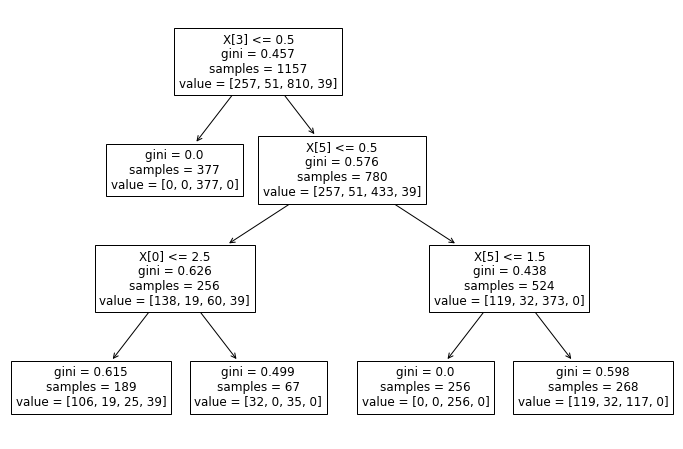

In [35]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

# Decision Tree with criterion entropy



In [36]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [37]:
y_pred_en = clf_en.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7965


# Check for overfitting underfitting

In [39]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7718
Test set score: 0.7965


# Visualization

[Text(0.375, 0.875, 'X[3] <= 0.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]'),
 Text(0.5, 0.625, 'X[5] <= 0.5\nentropy = 1.472\nsamples = 780\nvalue = [257, 51, 433, 39]'),
 Text(0.25, 0.375, 'X[0] <= 2.5\nentropy = 1.663\nsamples = 256\nvalue = [138, 19, 60, 39]'),
 Text(0.125, 0.125, 'entropy = 1.657\nsamples = 189\nvalue = [106, 19, 25, 39]'),
 Text(0.375, 0.125, 'entropy = 0.999\nsamples = 67\nvalue = [32, 0, 35, 0]'),
 Text(0.75, 0.375, 'X[5] <= 1.5\nentropy = 1.081\nsamples = 524\nvalue = [119, 32, 373, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 256\nvalue = [0, 0, 256, 0]'),
 Text(0.875, 0.125, 'entropy = 1.408\nsamples = 268\nvalue = [119, 32, 117, 0]')]

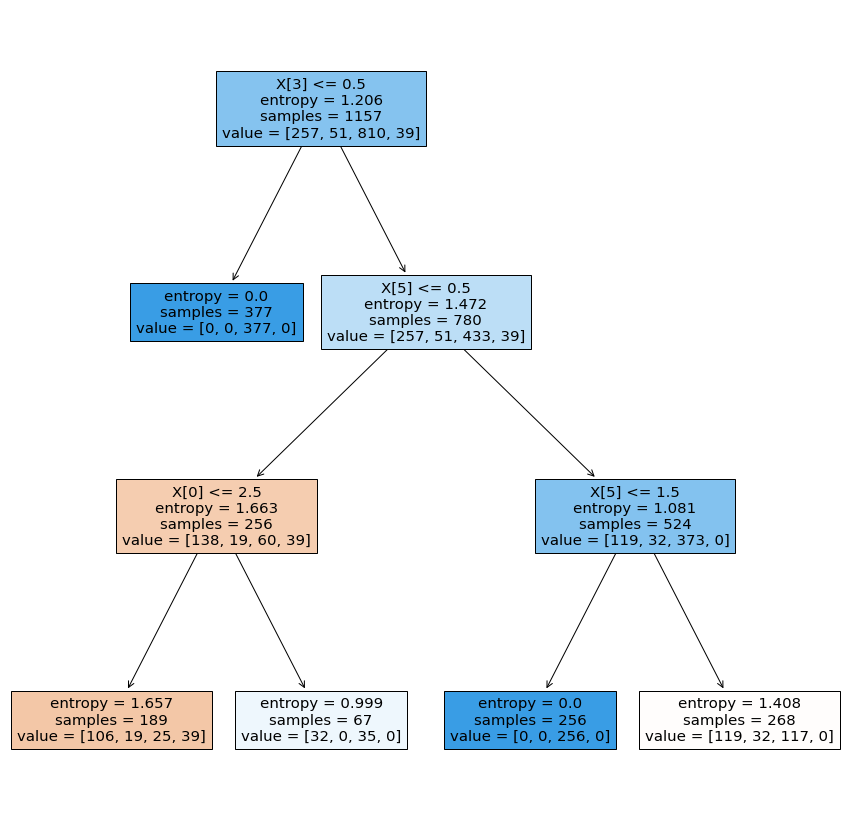

In [44]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(clf_en.fit(X_train, y_train), filled =True)


[Text(0.375, 0.875, 'persons <= 0.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]\nclass = unacc'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]\nclass = unacc'),
 Text(0.5, 0.625, 'safety <= 0.5\nentropy = 1.472\nsamples = 780\nvalue = [257, 51, 433, 39]\nclass = unacc'),
 Text(0.25, 0.375, 'buying <= 2.5\nentropy = 1.663\nsamples = 256\nvalue = [138, 19, 60, 39]\nclass = unacc'),
 Text(0.125, 0.125, 'entropy = 1.657\nsamples = 189\nvalue = [106, 19, 25, 39]\nclass = unacc'),
 Text(0.375, 0.125, 'entropy = 0.999\nsamples = 67\nvalue = [32, 0, 35, 0]\nclass = unacc'),
 Text(0.75, 0.375, 'safety <= 1.5\nentropy = 1.081\nsamples = 524\nvalue = [119, 32, 373, 0]\nclass = unacc'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 256\nvalue = [0, 0, 256, 0]\nclass = unacc'),
 Text(0.875, 0.125, 'entropy = 1.408\nsamples = 268\nvalue = [119, 32, 117, 0]\nclass = unacc')]

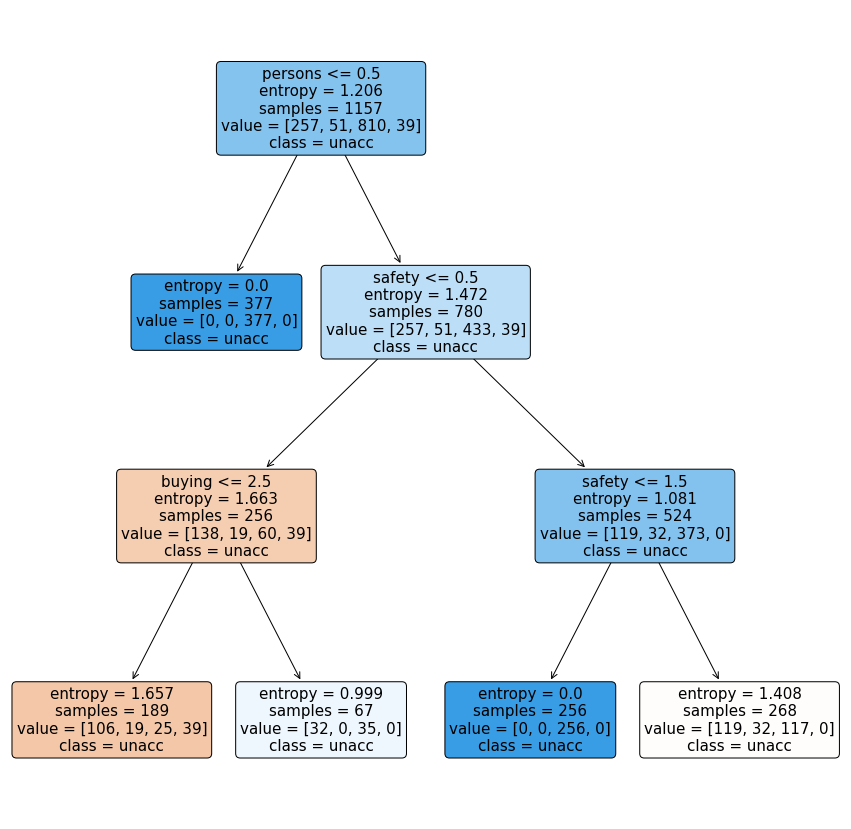

In [45]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(clf_en, feature_names =list(X.columns), class_names = y_train, filled =True, rounded =True)

In [47]:
import warnings

warnings.filterwarnings('ignore')

# Classification Report

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.53      0.89      0.66       127
        good       0.00      0.00      0.00        18
       unacc       0.96      0.85      0.90       399
       vgood       0.00      0.00      0.00        26

    accuracy                           0.80       570
   macro avg       0.37      0.44      0.39       570
weighted avg       0.79      0.80      0.78       570



# Confusion Matrix

In [49]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[113   0  14   0]
 [ 18   0   0   0]
 [ 58   0 341   0]
 [ 26   0   0   0]]


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

# Results

In this project, I build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion gini index and another one with criterion entropy. + The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.7965.
+ In the model with criterion gini index, the training-set accuracy score is 0.7718 while the test-set accuracy to be 0.7965. These two values are quite comparable. So, there is no sign of overfitting.
+ Similarly, in the model with criterion entropy, the training-set accuracy score is 0.7718 while the test-set accuracy to be 0.7965.We get the same values as in the case with criterion gini. So, there is no sign of overfitting.
+ In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.
+ The confusion matrix and classification report yields very good model performance.